<a href="https://colab.research.google.com/github/Hlo-Mayur/Rocks-Vs-Mines-Prediction/blob/main/notebooks/rocks_vs_mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Data Processing


In [2]:
#loading the dataset to a pandas dataframe
sonar_data=pd.read_csv('/content/Copy of sonar data.csv',header=None)

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#number of rows and columns
sonar_data.shape

(208, 61)

In [5]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [6]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [7]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [9]:
print(X)
print(Y)

         0       1       2       3   ...      56      57      58      59
0    0.0200  0.0371  0.0428  0.0207  ...  0.0180  0.0084  0.0090  0.0032
1    0.0453  0.0523  0.0843  0.0689  ...  0.0140  0.0049  0.0052  0.0044
2    0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
3    0.0100  0.0171  0.0623  0.0205  ...  0.0050  0.0044  0.0040  0.0117
4    0.0762  0.0666  0.0481  0.0394  ...  0.0072  0.0048  0.0107  0.0094
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
203  0.0187  0.0346  0.0168  0.0177  ...  0.0065  0.0115  0.0193  0.0157
204  0.0323  0.0101  0.0298  0.0564  ...  0.0034  0.0032  0.0062  0.0067
205  0.0522  0.0437  0.0180  0.0292  ...  0.0140  0.0138  0.0077  0.0031
206  0.0303  0.0353  0.0490  0.0608  ...  0.0034  0.0079  0.0036  0.0048
207  0.0260  0.0363  0.0136  0.0272  ...  0.0040  0.0036  0.0061  0.0115

[208 rows x 60 columns]
0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M


Training and Test Data

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [11]:
print(X.shape,X_train.shape,X_test.shape)


(208, 60) (187, 60) (21, 60)


Model Training-->Logistic Regression

In [12]:
model=LogisticRegression()

In [13]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation


In [14]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [15]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8342245989304813


In [16]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [17]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.7619047619047619


Making a predictive system

In [28]:
input_data=(0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,0.5466,0.5205,0.5127,0.5395,0.6558,0.8705,0.9786,0.9335,0.7917,0.7383,0.6908,0.3850,0.0671,0.0502,0.2717,0.2839,0.2234,0.1911,0.0408,0.2531,0.1979,0.1891,0.2433,0.1956,0.2667,0.1340,0.1073,0.2023,0.1794,0.0227,0.1313,0.1775,0.1549,0.1626,0.0708,0.0129,0.0795,0.0762,0.0117,0.0061,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131)
#changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshpae the np array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['M']
The object is a Mine


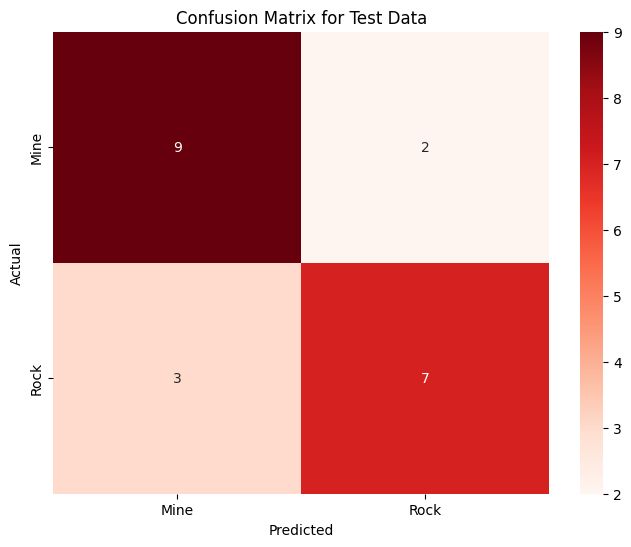

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the test data
cm = confusion_matrix(Y_test, X_test_prediction)

# Display the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Mine', 'Rock'], yticklabels=['Mine', 'Rock'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Data')
plt.show()

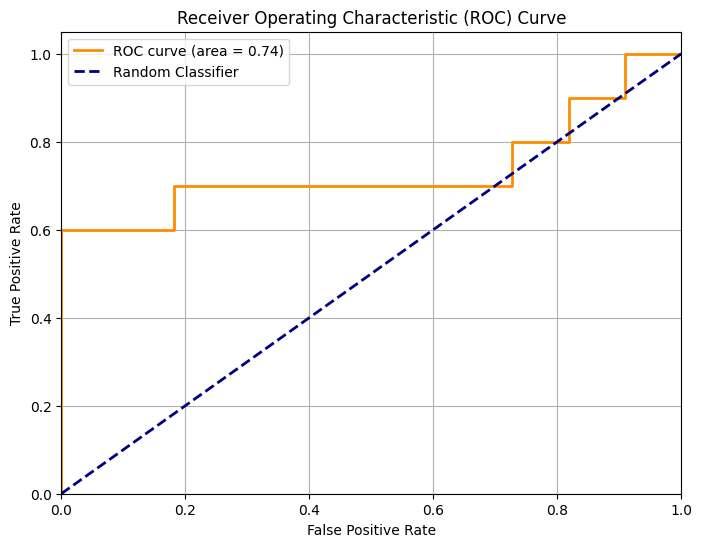

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (Rock 'R')
# LogisticRegression.classes_ will show the order of classes, e.g., ['M', 'R']
# We need the probability of the second class if 'R' is the second, or first if 'R' is first.
# Assuming 'R' is the positive class. Let's find its index.
positive_class_idx = list(model.classes_).index('R')
Y_pred_proba = model.predict_proba(X_test)[:, positive_class_idx]

# Convert Y_test labels to numerical (0 for 'M', 1 for 'R')
Y_test_numerical = Y_test.apply(lambda x: 1 if x == 'R' else 0)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_numerical, Y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [38]:
import joblib

# Define a filename for your model
model_filename = 'logistic_regression_sonar_model.joblib'

# Save the trained model to a file
joblib.dump(model, model_filename)

print(f'Model saved successfully as {model_filename}')

# To load the model later, you would do:
# loaded_model = joblib.load(model_filename)
# print('Model loaded successfully!')

Model saved successfully as logistic_regression_sonar_model.joblib


Once you run the above cell, you will see a file named `logistic_regression_sonar_model.joblib` in your Colab files panel (the folder icon on the left). You can download this file to your local machine.

Now, regarding **adding your project (Colab notebook) to GitHub**, Google Colab has excellent built-in integration:

1.  **Save a copy to GitHub:** Go to `File` > `Save a copy in GitHub...`.
    *   You'll be prompted to connect your GitHub account if you haven't already.
    *   You can choose an existing repository or create a new one.
    *   You can also add a commit message.
2.  **Open from GitHub:** You can also open notebooks directly from GitHub using `File` > `Open notebook` > `GitHub` tab.

This process will save your entire Colab notebook (including code, outputs, and text cells) as an `.ipynb` file in your chosen GitHub repository.

In [37]:
from sklearn.metrics import precision_score

# Calculate precision score for the test data, with 'R' as the positive class
# (TP / (TP + FP))
precision = precision_score(Y_test, X_test_prediction, pos_label='R')

print(f'Precision for the positive class (Rock): {precision:.4f}')

Precision for the positive class (Rock): 0.7778
